In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import CMean, FuzzyClustring, GustafsonKessel

import numpy as np
import math
from random import shuffle

def scatter_2d(data):
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']
    plt.scatter(data[:, 0], data[:, 1], color=colors[1], lw=0)
    plt.xlim(np.min(data[:,0])-0.1*np.min(data[:,0]), np.max(data[:,0])+0.1*np.min(data[:,0]))
    plt.ylim(np.min(data[:,1])-0.1*np.min(data[:,0]), np.max(data[:,1])+0.1*np.min(data[:,0]))
    plt.title('Original data')
    plt.show()


def generate_2d(clusters, q=1000):
    noise=10
    res = np.empty((q, 2))
    centers = q/5 + np.random.uniform(size=(clusters, 2)) * q*clusters/5
    radiuses = 50 + np.random.uniform(size=clusters) * q/5
    for i in range(q):
        ind = np.random.randint(clusters)
        alpha = np.random.uniform(high=2*math.pi)
        r = np.random.uniform(high=radiuses[ind])
        res[i] = centers[ind] + \
                 np.array([r * math.cos(alpha), r * math.sin(alpha)]) + \
                 np.array([np.random.randint(noise), np.random.randint(noise)])
    return res



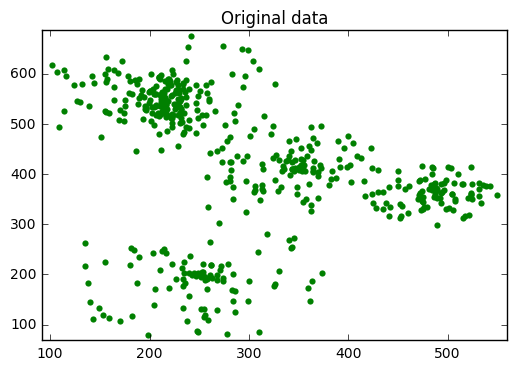

### 30
finish 0.000944272891877  <  0.0012
distance sum:  152925468.931


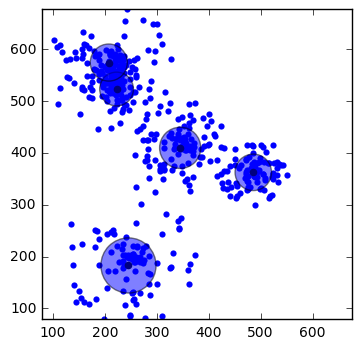

[CMeans cluster# v=[ 222.09458463  523.02154424] r=32.5620831049, CMeans cluster# v=[ 344.80756725  409.58839751] r=39.7152701845, CMeans cluster# v=[ 245.08070887  182.75344   ] r=53.1801113638, CMeans cluster# v=[ 485.78682813  362.34921166] r=35.1589620944, CMeans cluster# v=[ 207.11274938  574.12533766] r=35.7532081583]


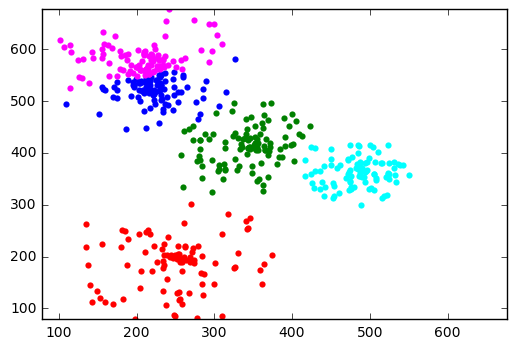

In [8]:
num_clusters = 5

np.random.seed(5) # for reproducibility
q = 100 * num_clusters
xs = generate_2d(num_clusters, q=q)
scatter_2d(xs)

clusters = [CMean.CMeanCluster(np.max(xs), 2) for k in range(num_clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

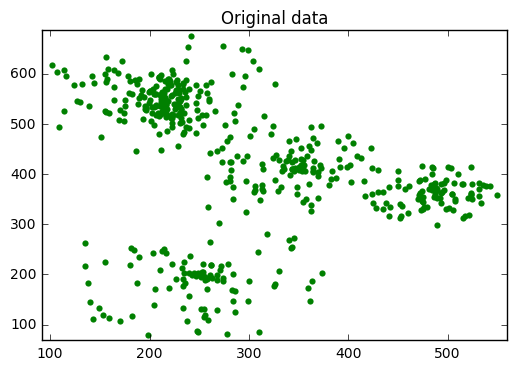

### 42
finish 0.00130423972739  <  0.00144
distance sum:  140405138.0


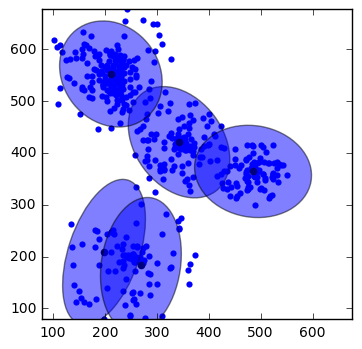

[GustafsonKessel cluster# v=[ 342.56639536  420.43169727] A=[[ 1.15198063  0.32195364]
 [ 0.32195364  0.95804923]], GustafsonKessel cluster# v=[ 197.94674949  208.43391816] A=[[ 1.9707113  -0.50792899]
 [-0.50792899  0.63834406]], GustafsonKessel cluster# v=[ 485.32017542  364.11373857] A=[[ 0.7918317   0.08541222]
 [ 0.08541222  1.27210775]], GustafsonKessel cluster# v=[ 269.06246993  183.93010285] A=[[ 1.68841006 -0.16463414]
 [-0.16463414  0.60832639]], GustafsonKessel cluster# v=[ 211.16721253  552.04515367] A=[[ 1.04580924  0.15406456]
 [ 0.15406456  0.97889352]]]


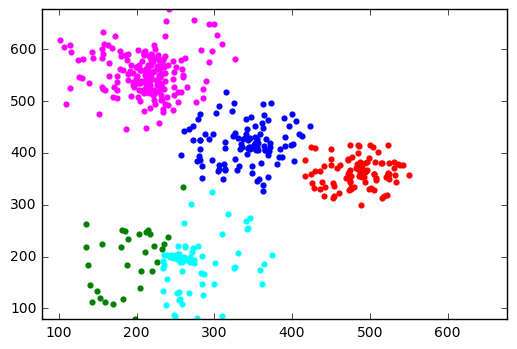

In [9]:
scatter_2d(xs)

clusters = [GustafsonKessel.GKCluster(np.max(xs), 2) for k in range(num_clusters)]
fc = FuzzyClustring.FuzzyClassifier(xs, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

In [10]:
xs.shape

(500, 2)

In [11]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

reduced_data = PCA(n_components=2).fit_transform(data)


In [12]:
np.max(reduced_data)

9.9825596302115347

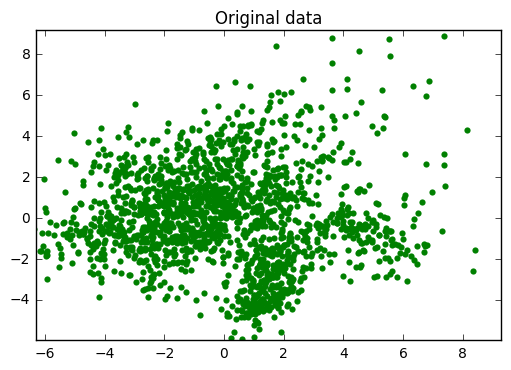

### 47
finish 0.00136911621744  <  0.00144
distance sum:  452237.313907


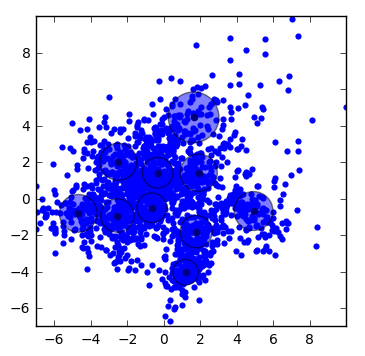

[CMeans cluster# v=[-0.33291691  1.42208107] r=0.839899298228, CMeans cluster# v=[-2.54427155 -0.92362498] r=0.913088732086, CMeans cluster# v=[ 1.63208896  4.45738325] r=1.38791479012, CMeans cluster# v=[ 1.19231558 -4.0321211 ] r=0.697704730209, CMeans cluster# v=[-0.65621852 -0.49716747] r=0.810858747973, CMeans cluster# v=[ 1.77375636 -1.8027288 ] r=0.882647837386, CMeans cluster# v=[ 4.91363121 -0.67487869] r=1.06442389599, CMeans cluster# v=[ 1.91656223  1.4257716 ] r=1.01618808369, CMeans cluster# v=[-2.48975879  2.02237491] r=1.01409203107, CMeans cluster# v=[-4.68516864 -0.80194135] r=1.0333271278]


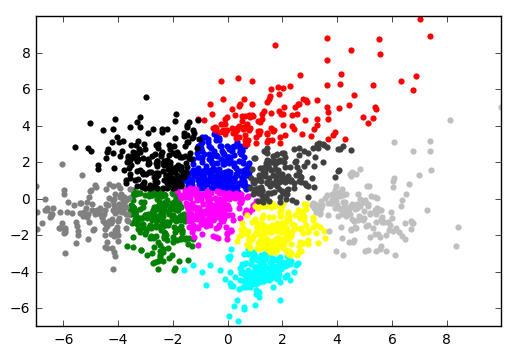

In [13]:
num_clusters = 10

scatter_2d(reduced_data)

clusters = [CMean.CMeanCluster(np.max(reduced_data), 2) for k in range(num_clusters)]
fc = FuzzyClustring.FuzzyClassifier(reduced_data, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()

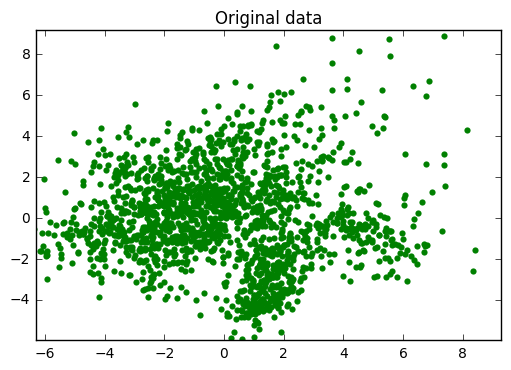

### 81
finish 0.00176655336151  <  0.0020736
distance sum:  532187.041768


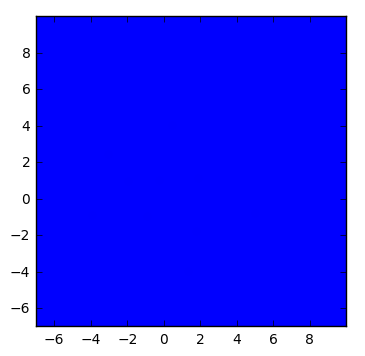

[GustafsonKessel cluster# v=[-1.98691895  0.96199123] A=[[ 1.08144645 -0.9552606 ]
 [-0.9552606   1.76848592]], GustafsonKessel cluster# v=[ 1.76011758 -1.76284032] A=[[ 1.10875065 -0.6443883 ]
 [-0.6443883   1.2764243 ]], GustafsonKessel cluster# v=[-3.03972346  2.44888933] A=[[ 0.83730238 -0.24299333]
 [-0.24299333  1.2648307 ]], GustafsonKessel cluster# v=[ 1.89670151  1.13821615] A=[[ 1.60892762 -0.80613837]
 [-0.80613837  1.02544021]], GustafsonKessel cluster# v=[ 0.47106565  4.03911773] A=[[ 1.05887974 -0.91934149]
 [-0.91934149  1.74258578]], GustafsonKessel cluster# v=[-3.93771492 -0.87719638] A=[[ 0.5144065  -0.01877004]
 [-0.01877004  1.94467277]], GustafsonKessel cluster# v=[ 1.33461725 -3.98585935] A=[[ 1.481341   -0.68001733]
 [-0.68001733  0.98722952]], GustafsonKessel cluster# v=[ 4.99142546 -0.80631773] A=[[ 1.0561465   0.3554535 ]
 [ 0.3554535   1.06646871]], GustafsonKessel cluster# v=[-0.91289523 -0.95078911] A=[[ 1.18989065 -0.92667119]
 [-0.92667119  1.56209269]], 

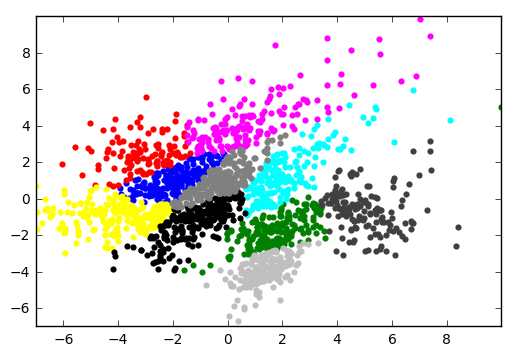

In [14]:
num_clusters = 10

scatter_2d(reduced_data)

clusters = [GustafsonKessel.GKCluster(np.max(reduced_data), 2) for k in range(num_clusters)]
fc = FuzzyClustring.FuzzyClassifier(reduced_data, clusters, m=2)
fc.fit(delta=.001, increase_iteration=20, increase_factor=1.2, plot_level=1, verbose_level=0, verbose_iteration=100)
print fc.C
fc.scatter_clusters_data()